In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import rpy2.robjects as ro
from rpy2.robjects.packages import importr

In [139]:
base = importr('base')

This note book demonstrates various methods to measure correlations between data (numerical and categorical), both in Python and in R. 

(Still under heavy construction.)

# Make data

In [140]:
N = 100

## Numericals

In [141]:
some_numerical = np.random.uniform(0, 1, N)
some_numerical_with_noise = some_numerical + 0.1*np.random.randn(N)

some_numerical_r = ro.FloatVector(some_numerical)
some_numerical_with_noise_r = ro.FloatVector(some_numerical_with_noise)

## Categoricals

In [142]:
def generate_random_ints(num_categories, N):
    some_random_int = np.random.randint(0, num_categories, N)
    correlated_random_int = some_random_int.copy()
    
    for i in range(len(some_random_int)):
        if np.random.uniform(0, 1)>0.9:
            correlated_random_int[i]=np.random.randint(0, num_categories, 1)
    return some_random_int, correlated_random_int

### Binary

In [143]:
some_random_int_binary, correlated_random_int = generate_random_ints(2, N)

some_random_int_binary_r = ro.IntVector(some_random_int_binary)
correlated_random_int_r = ro.IntVector(correlated_random_int)
        
some_categorical_binary = [str(i) for i in some_random_int_binary]
correlated_binary = [str(i) for i in correlated_random_int] 

some_categorical_binary_r = ro.FactorVector(some_categorical_binary)
correlated_binary_r = ro.FactorVector(correlated_binary)

### Multiple 

In [144]:
some_random_int_multiple, correlated_random_int_multiple = generate_random_ints(5, N)

some_random_int_multiple_r = ro.IntVector(some_random_int_multiple)
correlated_random_int_multiple_r = ro.IntVector(correlated_random_int_multiple)
        
some_categorical_multiple = [str(i) for i in some_random_int_multiple]
correlated_multiple = [str(i) for i in some_random_int_multiple] 

some_categorical_multiple_r = ro.FactorVector(some_categorical_multiple)
correlated_multiple_r = ro.FactorVector(correlated_multiple)

## Numerical v.s. categorical

### Binary categorical

In [145]:
numerical_correlated_to_some_categorical_binary = np.array([np.random.normal(0, 1) if c=='0' else np.random.normal(1, 1) for c in some_categorical_binary])
numerical_correlated_to_some_categorical_binary_r = ro.FloatVector(numerical_correlated_to_some_categorical_binary)

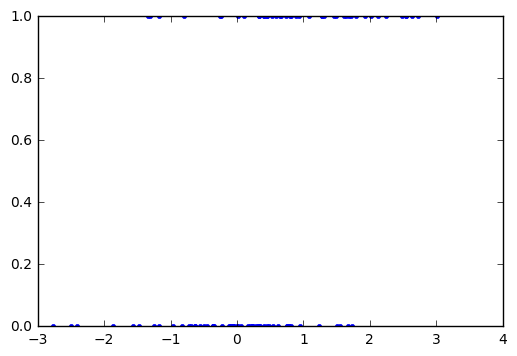

In [146]:
plt.plot(numerical_correlated_to_some_categorical_binary, correlated_random_int, '.');

### Multiple categorical

In [147]:
numerical_correlated_to_some_categorical_multiple = np.array([np.random.normal(int(c), 1) for c in some_categorical_multiple])
numerical_correlated_to_some_categorical_multiple_r = ro.FloatVector(numerical_correlated_to_some_categorical_multiple)

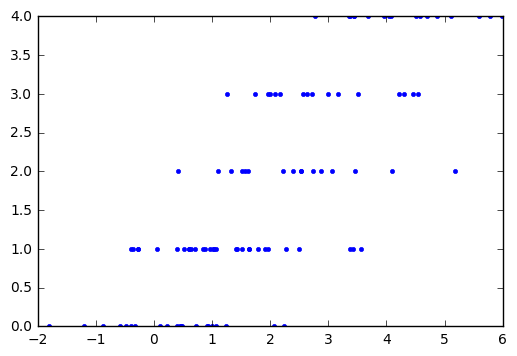

In [148]:
plt.plot(numerical_correlated_to_some_categorical_multiple, some_categorical_multiple, '.');

# Numerical v.s. numerical

## Pearson correlation coefficient

In [149]:
scipy.stats.pearsonr(some_numerical, some_numerical_with_noise)

(0.94200443993985927, 2.8921444169664683e-48)

In [150]:
print ro.r.cor(some_numerical_r, some_numerical_with_noise_r)

[1] 0.9420044



# Categorical v.s. categorical

## Chi-square

### Binary

In [151]:
res = ro.r('chisq.test')(some_categorical_binary_r, correlated_binary_r)
res.names.r_repr()
print res[res.names.index('statistic')]
print res[res.names.index('p.value')]

'c("statistic", "parameter", "p.value", "method", "data.name", \n"observed", "expected", "residuals", "stdres")'

X-squared 
  84.4236 

[1] 3.993526e-20



### Multiple

In [152]:
res = ro.r('chisq.test')(some_categorical_multiple_r, correlated_multiple_r)
res.names.r_repr()
print res[res.names.index('statistic')]
print res[res.names.index('p.value')]

'c("statistic", "parameter", "p.value", "method", "data.name", \n"observed", "expected", "residuals", "stdres")'

X-squared 
      400 

[1] 3.641455e-75



# Numerical v.s. categorical

## t-test

### Python

In [153]:
numerical_correlated_to_some_categorical_binary_0 = numerical_correlated_to_some_categorical_binary[np.where(correlated_random_int==0)]
numerical_correlated_to_some_categorical_binary_1 = numerical_correlated_to_some_categorical_binary[np.where(correlated_random_int==1)]
scipy.stats.ttest_ind(numerical_correlated_to_some_categorical_binary_0, 
                      numerical_correlated_to_some_categorical_binary_1, 
                      axis=0, equal_var=True)

Ttest_indResult(statistic=-5.3776213267675397, pvalue=5.1290378306578222e-07)

In [154]:
some_numerical_with_noise_0=some_numerical_with_noise[np.where(correlated_random_int==0)]
some_numerical_with_noise_1=some_numerical_with_noise[np.where(correlated_random_int==1)]
scipy.stats.ttest_ind(some_numerical_with_noise_0, 
                      some_numerical_with_noise_1,
                      axis=0, equal_var=True)

Ttest_indResult(statistic=0.96677584126505345, pvalue=0.33603590071955858)

### R

Correlated

In [155]:
numerical_correlated_to_some_categorical_binary_0_r = ro.FloatVector(numerical_correlated_to_some_categorical_binary_0)
numerical_correlated_to_some_categorical_binary_1_r = ro.FloatVector(numerical_correlated_to_some_categorical_binary_1)
res = ro.r('t.test')(numerical_correlated_to_some_categorical_binary_0_r, 
                     numerical_correlated_to_some_categorical_binary_1_r)
res.names.r_repr()
print res[res.names.index('statistic')]
print res[res.names.index('p.value')]

'c("statistic", "parameter", "p.value", "conf.int", "estimate", \n"null.value", "alternative", "method", "data.name")'

       t 
-5.30807 

[1] 8.314932e-07



Uncorrelated

In [156]:
some_numerical_with_noise_0_r = ro.FloatVector(some_numerical_with_noise_0)
some_numerical_with_noise_1_r = ro.FloatVector(some_numerical_with_noise_1)
res = ro.r('t.test')(some_numerical_with_noise_0_r, 
                     some_numerical_with_noise_1_r)
res.names.r_repr()
print res[res.names.index('statistic')]
print res[res.names.index('p.value')]

'c("statistic", "parameter", "p.value", "conf.int", "estimate", \n"null.value", "alternative", "method", "data.name")'

        t 
0.9518389 

[1] 0.3438399



## Analysis of Variance

### Python

In [157]:
scipy.stats.f_oneway(numerical_correlated_to_some_categorical_binary[np.where(correlated_random_int==0)], numerical_correlated_to_some_categorical_binary[np.where(correlated_random_int==1)])

F_onewayResult(statistic=28.918811134105074, pvalue=5.1290378306578138e-07)

In [158]:
scipy.stats.f_oneway(some_numerical_with_noise[np.where(correlated_random_int==0)], some_numerical_with_noise[np.where(correlated_random_int==1)])

F_onewayResult(statistic=0.93465552725374812, pvalue=0.33603590071955725)

### R

#### Binary

##### Correlated

In [159]:
df = ro.DataFrame({'num':numerical_correlated_to_some_categorical_binary_r, 'cat': correlated_binary_r})
aov_res = ro.r('aov')(ro.Formula('num~cat'), df)
print base.summary(aov_res)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cat          1  30.64   30.64   28.92 5.13e-07 ***
Residuals   98 103.84    1.06                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



##### Uncorrelated

In [160]:
df = ro.DataFrame({'num':some_numerical_with_noise_r, 'cat': some_categorical_binary_r})
aov_res = ro.r('aov')(ro.Formula('num~cat'), df)
print base.summary(aov_res)

            Df Sum Sq Mean Sq F value Pr(>F)
cat          1  0.099 0.09927   1.044   0.31
Residuals   98  9.322 0.09513               



#### Multiple

##### Correlated

In [161]:
df = ro.DataFrame({'num':numerical_correlated_to_some_categorical_multiple_r, 'cat': some_categorical_multiple_r})
aov_res = ro.r('aov')(ro.Formula('num~cat'), df)
print base.summary(aov_res)

            Df Sum Sq Mean Sq F value Pr(>F)    
cat          4  184.4   46.09   41.44 <2e-16 ***
Residuals   95  105.7    1.11                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



##### Uncorrelated

In [162]:
df = ro.DataFrame({'num':some_numerical_with_noise_r, 'cat': some_categorical_multiple_r})
aov_res = ro.r('aov')(ro.Formula('num~cat'), df)
print base.summary(aov_res)

            Df Sum Sq Mean Sq F value Pr(>F)
cat          4  0.091 0.02285   0.233  0.919
Residuals   95  9.330 0.09821               



References: 
- http://stats.stackexchange.com/questions/108007/correlations-with-categorical-variables
- http://www.ats.ucla.edu/stat/mult_pkg/whatstat/default.htm